What is the effect of the COVID-19 pandemic on online and distance learning, engagement
and how might this also evolve in the future?

The COVID-19 pandemic has greatly impacted online and distance learning. With the closure of schools and universities, many institutions had to move their classes online, causing a significant increase in the use of online learning platforms. Students and teachers had to adapt quickly to this new format, and this has led to challenges, such as technical issues, limited access to technology and internet, and difficulties with engagement and motivation.  

However, it has also brought new opportunities for education, such as the ability to reach students in remote,more flexibility in scheduling, and the potential for digital learning.

**The data provided includes three sets of files to help with analysis**

The engagement data has been aggregated at the school district level, and each file represents data from one school district.

The district file includes information about the characteristics of school districts, such as state, locale classification, percentage of black or Hispanic students, percentage of students eligible for free or reduced-price lunch, per-pupil total expenditure, and county connections ratio. 

The product file includes information about the characteristics of the top 372 products with most users in 2020, such as the product name, provider/company name, sector(s), primary essential function, and URL.

The provided data can be linked using unique identifiers such as lp_id and district_id

Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import glob
import os

In [3]:
df_district = pd.read_csv('districts_info.csv') 

In [4]:
df_district

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


district_id: The unique identifier of the school district

state: The state where the district resides in

locale: NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See [Locale Boundaries User's Manual](https://eric.ed.gov/?id=ED577162) for more information. 

pct_black/hispanic: Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data 

pct_free/reduced:  Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data 

county_connections_ratio: `ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See [FCC data](https://www.fcc.gov/form-477-county-data-internet-access-services) for more information.

pp_total_raw: Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

In [5]:
df_district.dropna()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
220,3732,Michigan,Suburb,"[0.4, 0.6[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
224,3266,Utah,Town,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[10000, 12000["
227,1705,Washington,City,"[0.2, 0.4[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["


We used dropna() to remove 'NaN's from the dataset.

In [ ]:
df_product = pd.read_csv("products_info.csv")

In [7]:
df_product


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN



LP ID: The unique identifier of the product 
 
URL:  Web Link to the specific product 
 
Product Name : Name of the specific product 
 
Provider/Company Name : Name of the product provider 
 
Sector(s) : Sector of education where the product is used 
  
Primary Essential Function: The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled 


We will also use dropna() for the other datasets. There are missing rows in the other datasets as well.  

In [8]:
df_product.dropna()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,"LC - Sites, Resources & Reference"
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,PreK-12,CM - Teacher Resources - Professional Learning
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation


In [9]:
all_files = glob.glob("engagement_data/*.csv")
df_engage = pd.concat([pd.read_csv(file).assign(file_name=os.path.basename(file)) for file in all_files], ignore_index=True)

In the engagement folder, there more than 100 files for each district school board. There are also column 'lp_id' indicates specific specific products and rates. We are going to merge these file into one dataset and transform the data. While merging the data, we will add a new column and store merged files names as they were named with district_id. 

In [10]:
df_engage

,time,lp_id,pct_access,engagement_index,file_name
0,2020-01-01,29322.0,0.04,1.30,3188.csv
1,2020-01-01,57084.0,0.04,0.43,3188.csv
2,2020-01-01,99916.0,0.09,5.20,3188.csv
3,2020-01-01,58235.0,0.00,NaN,3188.csv
4,2020-01-01,11585.0,0.04,1.30,3188.csv
...,...,...,...,...,...
4434627,2020-12-31,47364.0,0.30,82.44,7308.csv
4434628,2020-12-31,98102.0,0.00,NaN,7308.csv
4434629,2020-12-31,72468.0,0.00,NaN,7308.csv
4434630,2020-12-31,65277.0,0.00,NaN,7308.csv


In [12]:
df_engage["lp_id"] = df_engage["lp_id"].fillna(-1).replace([np.inf, -np.inf], -1).astype(int)
df_engage["file_name"] = df_engage["file_name"].str.replace(".csv", "")

/var/folders/2n/8sq3cy6n0cj45y98g4yxfh000000gn/T/ipykernel_1816/3028324935.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_engage["file_name"] = df_engage["file_name"].str.replace(".csv", "")


We will remove '.csv' part from the file_name column to merge with other dataset. 

In [13]:
df_engage

,time,lp_id,pct_access,engagement_index,file_name
0,2020-01-01,29322,0.04,1.30,3188
1,2020-01-01,57084,0.04,0.43,3188
2,2020-01-01,99916,0.09,5.20,3188
3,2020-01-01,58235,0.00,NaN,3188
4,2020-01-01,11585,0.04,1.30,3188
...,...,...,...,...,...
4434627,2020-12-31,47364,0.30,82.44,7308
4434628,2020-12-31,98102,0.00,NaN,7308
4434629,2020-12-31,72468,0.00,NaN,7308
4434630,2020-12-31,65277,0.00,NaN,7308


time: The date on which the usage was recorded

lp_id: A unique identifier for the educational resource that was used

pct_access: The percentage of students in the school district who accessed the resource on the given date

engagement_index: A measure of the level of engagement of the students who accessed the resource

file_name: The name of the file containing the data for the school district.

In [21]:
df_product = df_product.rename(columns={'LP ID': 'lp_id'})

df_engage['lp_id'] = df_engage['lp_id'].astype(int)

df_product['lp_id'] = df_product['lp_id'].astype(int)

merged_df = pd.merge(df_engage, df_product, on="lp_id")


Then, we will adjust the column names to merge datasets. It will match between them and It will be merged easily. 

In [22]:
merged_df


,time,lp_id,pct_access,engagement_index,file_name,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,2020-01-01,29322,0.04,1.30,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms
1,2020-01-02,29322,0.26,17.78,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms
2,2020-01-03,29322,0.82,121.42,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms
3,2020-01-05,29322,0.00,NaN,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,2020-01-06,29322,2.86,451.43,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms
...,...,...,...,...,...,...,...,...,...,...
2928905,2020-02-24,56695,0.02,0.32,4165,http://ellevationeducation.com/,Ellevation,Ellevation,PreK-12,"SDO - Data, Analytics & Reporting"
2928906,2020-09-04,56695,0.03,0.76,4165,http://ellevationeducation.com/,Ellevation,Ellevation,PreK-12,"SDO - Data, Analytics & Reporting"
2928907,2020-12-07,56695,0.02,0.15,4165,http://ellevationeducation.com/,Ellevation,Ellevation,PreK-12,"SDO - Data, Analytics & Reporting"
2928908,2020-06-05,56695,0.00,NaN,2517,http://ellevationeducation.com/,Ellevation,Ellevation,PreK-12,"SDO - Data, Analytics & Reporting"


In [23]:
merged_df = merged_df.rename(columns={'file_name': 'district_id'})

We change the name of the 'file_name' column to 'district_id'. We will change it to merge the datasets. 

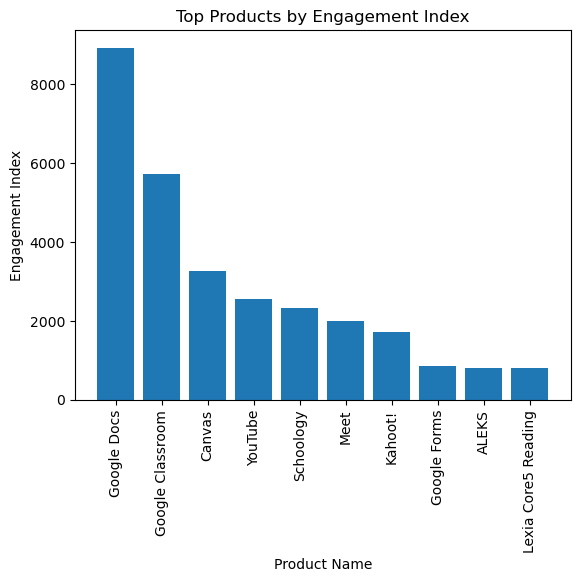

In [24]:
product_engage = merged_df.groupby('Product Name')['engagement_index'].mean().reset_index()


product_engage = product_engage.sort_values('engagement_index', ascending=False)


top_products = product_engage.head(10)
plt.bar(top_products['Product Name'], top_products['engagement_index'])
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Engagement Index')
plt.title('Top Products by Engagement Index')
plt.show()

Before we do the last merge with our datasets. We are going to make a plot with the top products by engagement index. We might identify some of the products would be very useful for the schools. Then, It could be an guidance to districts and states for efficiency in digital learning. 

In [27]:
df_district['district_id'] = df_district['district_id'].astype('int64')
merged_df['district_id'] = merged_df['district_id'].astype('int64')
merged_df = pd.merge(merged_df, df_district, on='district_id')

And finally, we make the last merge with our dataset. There are still NaN values in the merged dataset. We will clean the dataset. Then, we will analyze the data. 

In [28]:
merged_df

,time,lp_id,pct_access,engagement_index,district_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,29322,0.04,1.30,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29322,0.26,17.78,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,29322,0.82,121.42,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-05,29322,0.00,NaN,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-06,29322,2.86,451.43,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928905,2020-12-17,24829,1.04,119.30,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928906,2020-12-18,24829,0.10,17.43,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928907,2020-12-19,24829,0.03,11.39,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928908,2020-12-23,24829,0.03,6.37,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["


In [30]:
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')

In [31]:
merged_df

,time,lp_id,pct_access,engagement_index,district_id,url,product_name,provider/company_name,sector(s),primary_essential_function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,29322,0.04,1.30,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29322,0.26,17.78,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,29322,0.82,121.42,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-05,29322,0.00,NaN,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-06,29322,2.86,451.43,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928905,2020-12-17,24829,1.04,119.30,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928906,2020-12-18,24829,0.10,17.43,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928907,2020-12-19,24829,0.03,11.39,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928908,2020-12-23,24829,0.03,6.37,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["


Then, we need to clean our dataframe from Nan values. We will use **dropna()** function. 

In [32]:
merged_df = merged_df.dropna()

In [33]:
merged_df

,time,lp_id,pct_access,engagement_index,district_id,url,product_name,provider/company_name,sector(s),primary_essential_function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
116994,2020-01-06,29322,0.17,2.60,1204,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[6000, 8000["
116995,2020-01-08,29322,0.17,12.96,1204,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[6000, 8000["
116997,2020-01-13,29322,0.09,3.45,1204,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[6000, 8000["
116999,2020-01-16,29322,0.17,1.73,1204,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[6000, 8000["
117000,2020-01-22,29322,0.09,4.31,1204,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,Utah,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[6000, 8000["
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928905,2020-12-17,24829,1.04,119.30,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928906,2020-12-18,24829,0.10,17.43,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928907,2020-12-19,24829,0.03,11.39,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["
2928908,2020-12-23,24829,0.03,6.37,7308,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000["


<AxesSubplot:xlabel='locale', ylabel='engagement_index'>

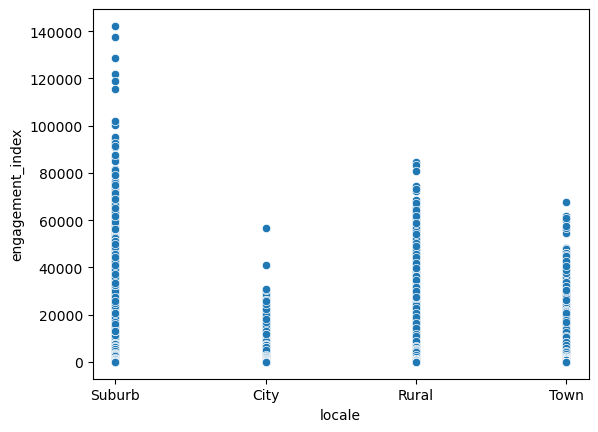

In [37]:
sns.scatterplot(x='locale', y='engagement_index', data=merged_df)

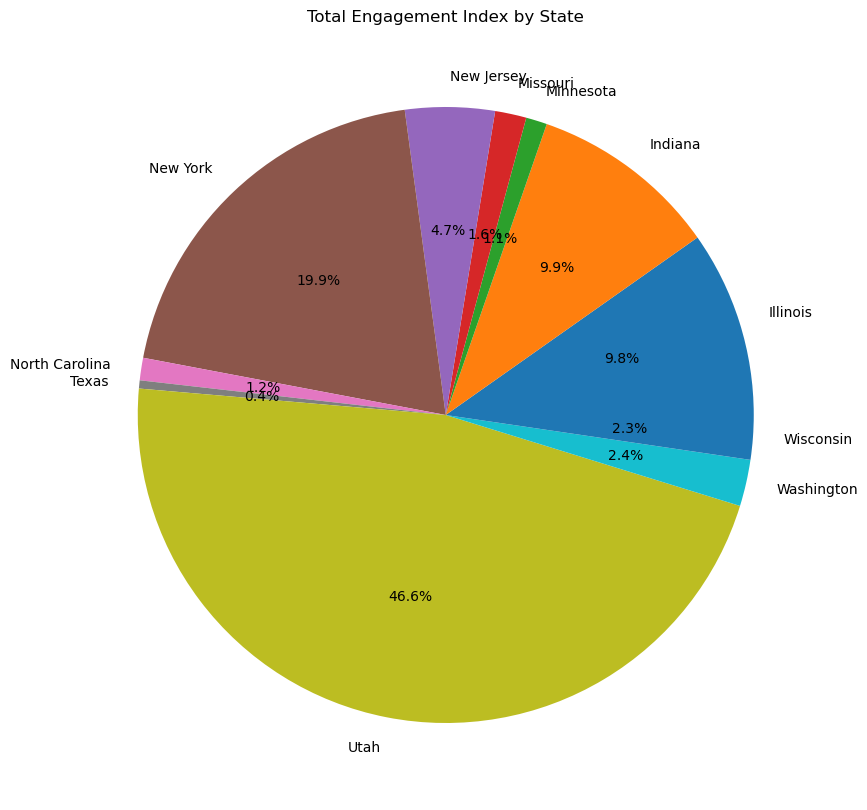

In [42]:
state_engagement = merged_df.groupby('state')['engagement_index'].sum()

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(state_engagement.values, labels=state_engagement.index, autopct='%1.1f%%')
ax.set_title('Total Engagement Index by State')

plt.show()

In the pie chart above, Total Engagemnet index by state shown. It is clear that Utah has the most total engagement index while many other has below 5 percent. 

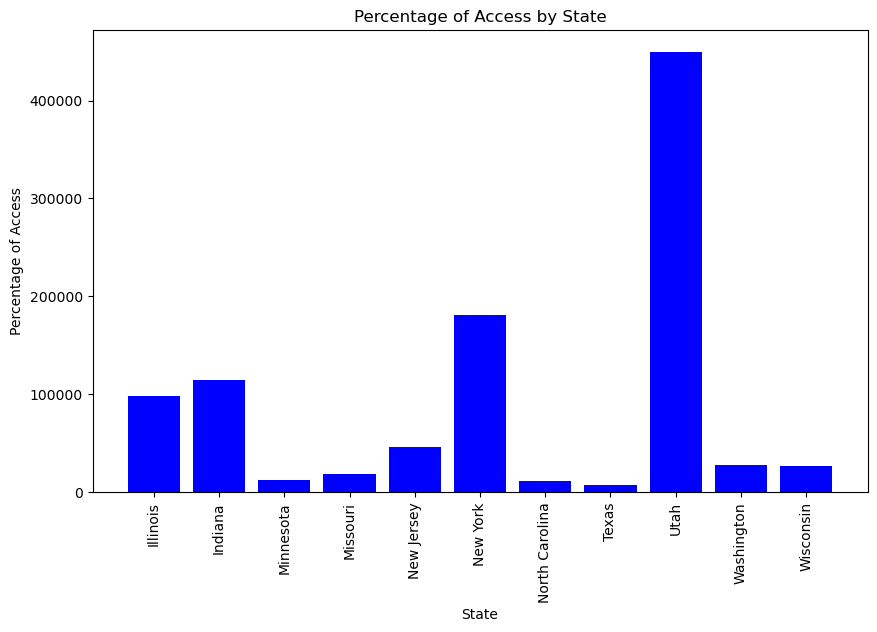

In [52]:
state_access = merged_df[['state', 'pct_access']].groupby('state').sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(state_access['state'], state_access['pct_access'], color='b')
plt.title('Percentage of Access by State')
plt.xlabel('State')
plt.ylabel('Percentage of Access')
plt.xticks(rotation=90)
plt.show()

In the graph above, it shows total pct_access by state. We can conclude that  

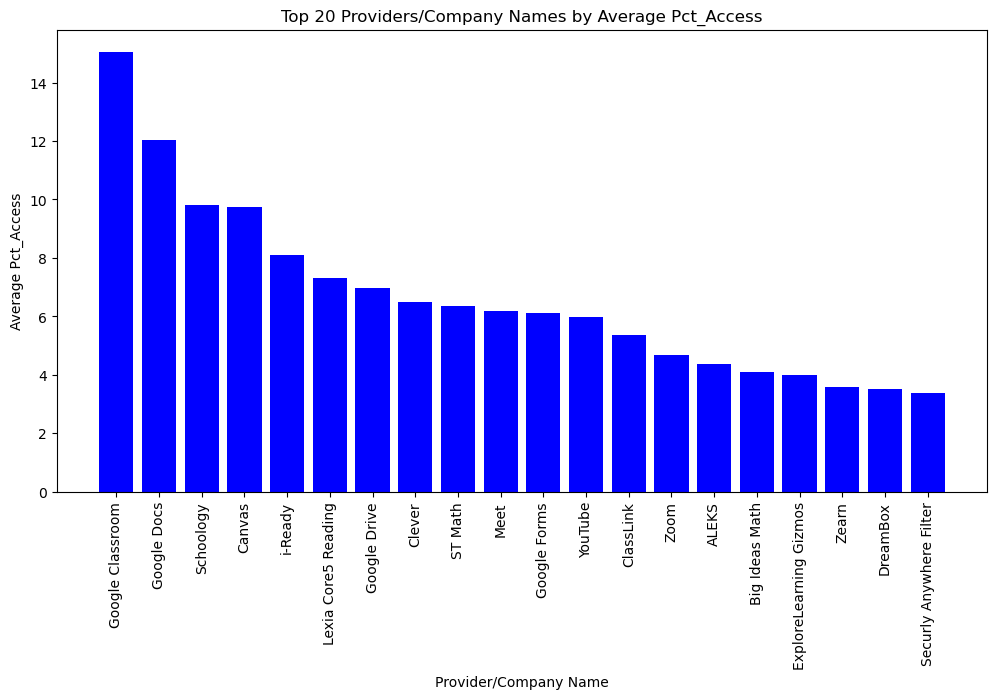

In [56]:
pct_access_by_provider = merged_df.groupby('product_name')['pct_access'].mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 6))
plt.bar(pct_access_by_provider.index, pct_access_by_provider.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Average Pct_Access')
plt.title('Top 20 Product Names by Average Pct_Access')
plt.show()

The graph show the top 20 products by pct_access rates. We can identify the most accessible products from the graph. 

Then, We can have a look at state by state. As we see in the graphs above, There are some states which has higher pct_access rates. Then, We might compare the products and their effectiveness. 

In [51]:
utah_df = merged_df[merged_df['state'] == 'Utah']


product_data = utah_df.groupby('product_name')['pct_access'].sum()

top_5_products = product_data.sort_values(ascending=False).head(5)



print(top_5_products)

product_name
Canvas              42329.66
Google Docs         39698.59
Google Classroom    33023.97
Google Drive        22549.03
i-Ready             15631.10
Name: pct_access, dtype: float64


In [55]:
ny_df = merged_df[merged_df['state'] == 'New York']

product_data_ny = ny_df.groupby('product_name')['pct_access'].sum()

top_5_products_ny = product_data_ny.sort_values(ascending=False).head(5)

print(top_5_products_ny)

product_name
Google Classroom    33159.25
Google Docs         28471.48
Meet                14380.19
Google Drive        11715.97
Google Forms        11499.91
Name: pct_access, dtype: float64


What about the states with lower pct access? Do they use the same products or different products? 

In [57]:
texas_df = merged_df[merged_df['state'] == 'Texas']

product_data_texas = texas_df.groupby('product_name')['pct_access'].sum()

top_5_products_texas = product_data_texas.sort_values(ascending=False).head(5)

print(top_5_products_texas)

product_name
Google Classroom    1030.43
Clever               692.24
Google Docs          609.70
Imagine Learning     430.79
Canvas               386.26
Name: pct_access, dtype: float64
